In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import sys
from proteus import Profiling,SpatialTools
from proteus import WaveTools as WT
import csv
from scipy.interpolate import CubicSpline

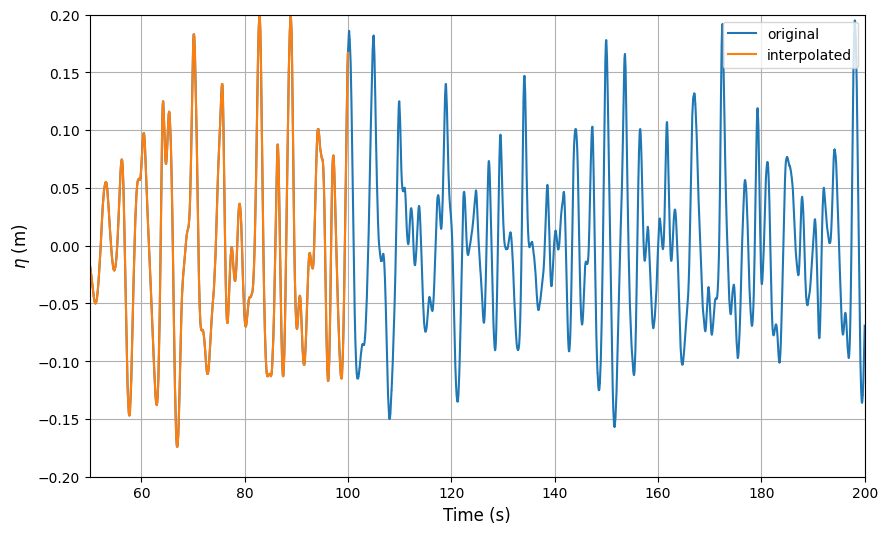

In [8]:
# load original experimental data
temp0 = np.loadtxt("inp_BL_TI1.csv", comments="#", delimiter=",", unpack=False)

# select abd cut the window for the wave elevation at the first wave gauge
ts = 50.
tf = 100 #1648.14
fs = 100
ns = int(ts*fs)
nf = int(tf*fs)

temp1 = np.zeros((nf-ns,2))
for i in range(nf-ns):
    temp1[i,0] = temp0[ns+i,0]-temp0[ns,0] #1./fs*i
    temp1[i,1] = temp0[ns+i,1]

# adjust sampling rate?
adfs = False # True
mul = 10
fs_2 = mul*fs

if adfs == True:
    temp = np.zeros((mul*(nf-ns),2))
    cs = CubicSpline(temp0[:,0], temp0[:,1])
    c = 0
    for i in range(nf-ns):
        for j in range(mul):
            temp[c,0] = temp0[ns+i,0]-temp0[ns,0]+1./fs_2*j
            temp[c,1] = cs(temp[c,0])
            c = c+1
else:            
    temp = temp1
    
plt.figure(1, figsize=(10,6), dpi=100)
psize=12
plt.plot(temp0[:,0],temp0[:,1],temp[:,0]+ts,temp[:,1])
plt.xlim(50,200)
plt.ylim(-0.2,0.2)
plt.xlabel("Time (s)", size=psize)
plt.ylabel("$\eta$ (m)", size=psize)
plt.legend(['original','interpolated'],loc='upper right')
plt.grid()
plt.show()

0.009999999999999998


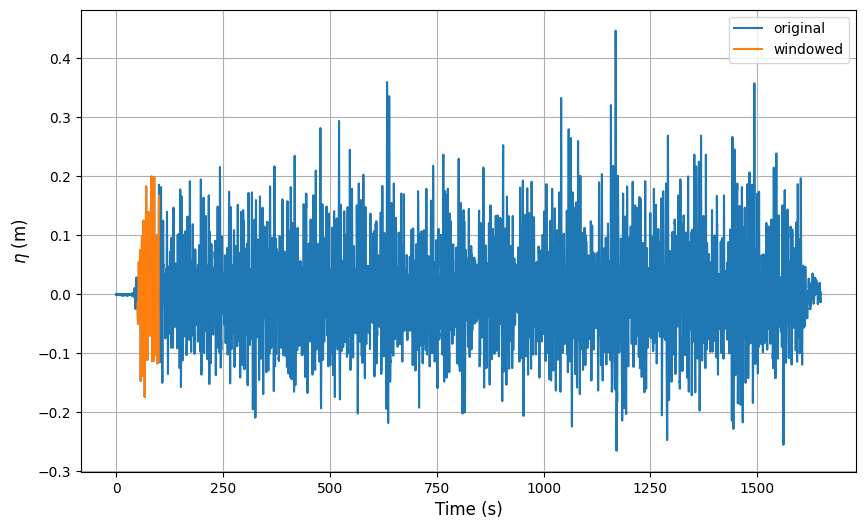

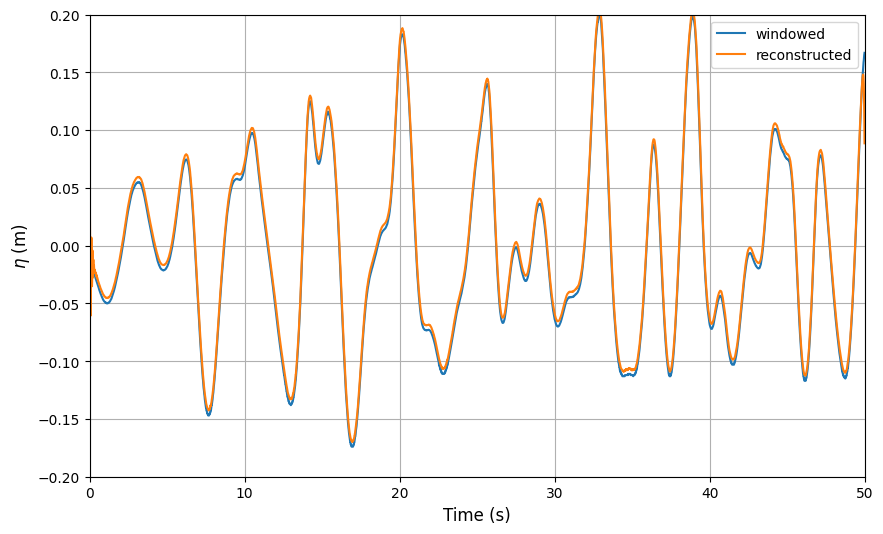

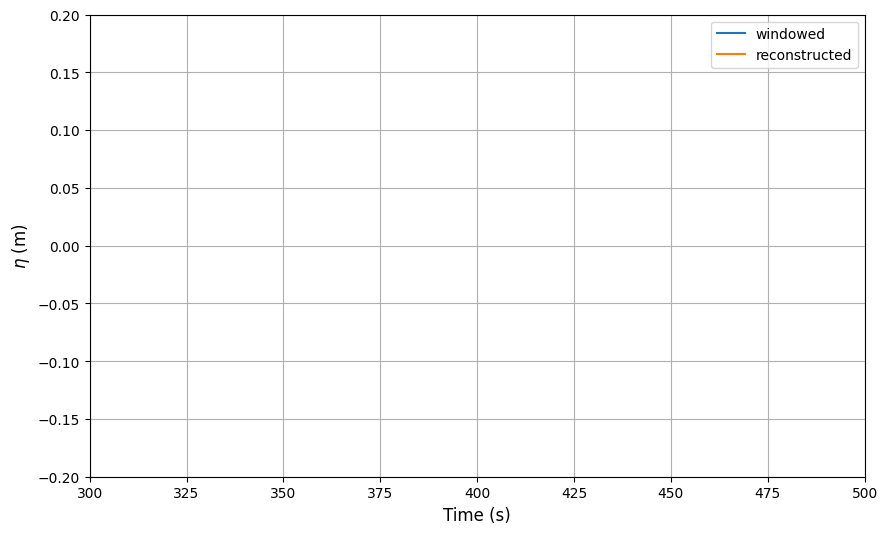

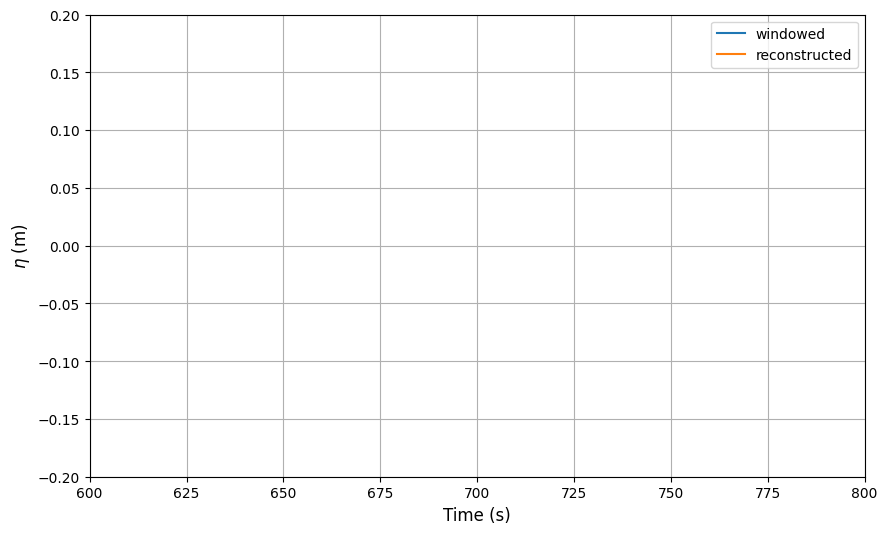

In [9]:

# make new record to be loaded in Proteus
np.savetxt('test.csv',temp, delimiter=",")
exp = np.loadtxt("test.csv", comments="#", delimiter=",", unpack=False)

# configurations of numerical flume
mwl=1.88
depth=1.88
g=np.array([0.0,0.0,-9.81])
waveDir = np.array([1., 0., 0.])

# create wave
skiprows=0
N=5000
window_params=None
timeSeriesPosition=np.array([0, 0.,0.0])
TS = WT.TimeSeries(timeSeriesFile="test.csv", #None, # e.g.= "Timeseries.txt",
                 skiprows=skiprows,
                 timeSeriesPosition=timeSeriesPosition,
                 depth=depth,
                 N=N ,          #number of frequency bins
                 mwl=mwl,        #mean water level
                 waveDir=waveDir, 
                 g=g,
                 cutoffTotal = 0.001,
                 #rec_direct = False,
                 #window_params = {"Nwaves":Nwaves,"Tm":Tm,"Window":wind_filt,"Overlap":overlap,"Cutoff":cutoff} ,
                 #arrayData=True,
                 #seriesArray=np.vstack([tnlist,eta_t]).transpose()
                 fast = False
                 )

# compute wave elevation and velocity
# tnlist = np.linspace(0,exp[-1,0],(len(exp)-1)*mul+1)
tnlist = np.linspace(0,exp[-1,0],len(exp))
print(tnlist[1]-tnlist[0])

eta = np.zeros(len(tnlist))
for i in range(len(tnlist)):
    x = [0.01, 0., 0.]
    t = tnlist[i]
    eta[i] = TS.eta(x, t)

# plots and comparison
plt.figure(1, figsize=(10,6), dpi=100)
psize=12
plt.plot(temp0[:,0],temp0[:,1],temp[:,0]+ts,temp[:,1])
plt.xlabel("Time (s)", size=psize)
plt.ylabel("$\eta$ (m)", size=psize)
plt.legend(['original','windowed'],loc='upper right')
plt.grid()
plt.show()

plt.figure(2, figsize=(10,6), dpi=100)
psize=12
plt.xlim(0,50)
plt.ylim(-0.2,0.2)
plt.plot(exp[:,0],exp[:,1],tnlist, eta)
plt.xlabel("Time (s)", size=psize)
plt.ylabel("$\eta$ (m)", size=psize)
plt.legend(['windowed','reconstructed'],loc='upper right')
plt.grid()
plt.show()

plt.figure(3, figsize=(10,6), dpi=100)
psize=12
plt.xlim(300,500)
plt.ylim(-0.2,0.2)
plt.plot(exp[:,0],exp[:,1],tnlist, eta)
plt.xlabel("Time (s)", size=psize)
plt.ylabel("$\eta$ (m)", size=psize)
plt.legend(['windowed','reconstructed'],loc='upper right')
plt.grid()
plt.show()

plt.figure(4, figsize=(10,6), dpi=100)
psize=12
plt.xlim(600,800)
plt.ylim(-0.2,0.2)
plt.plot(exp[:,0],exp[:,1],tnlist, eta)
plt.xlabel("Time (s)", size=psize)
plt.ylabel("$\eta$ (m)", size=psize)
plt.legend(['windowed','reconstructed'],loc='upper right')
plt.grid()
plt.show()


In [220]:
np.mean(exp[:,1])
np.mean(eta)

1.0476166150309097e-17

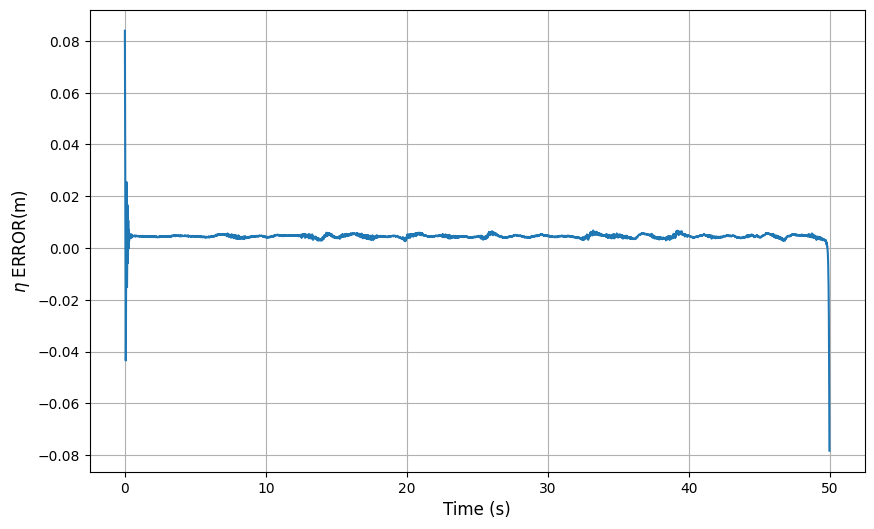

In [8]:
plt.figure(2, figsize=(10,6), dpi=100)
#plt.xlim(0., nperiod*Tp)
plt.plot(tnlist, eta-exp[:,1])
# plt.plot(tnlist, eta_ts_t-eta_t)
plt.xlabel("Time (s)", size=psize)
plt.ylabel("$\eta$ ERROR(m)", size=psize)
plt.grid()
plt.show()

In [8]:
X,Y = np.meshgrid(np.linspace(0.0,20.0,101),np.linspace(0.0,mwl+Hs,101))

In [9]:
e = np.zeros_like(X)
t=0.0
vmin=0.0
vmax=0.0
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i,j],0.0,Y[i,j]])
        #e[i,j] = (TS.u(x, t) - RW.u(x,t))[0]**2
        e[i,j] = RW.u(x,t)[2]
        if Y[i,j] >  depth + RW.eta(x, t):
            e[i,j] = np.nan
        else:
            vmin = min(vmin,e[i,j])
            vmax = max(vmax,e[i,j])

Text(0.5, 1.0, 'True Velocity')

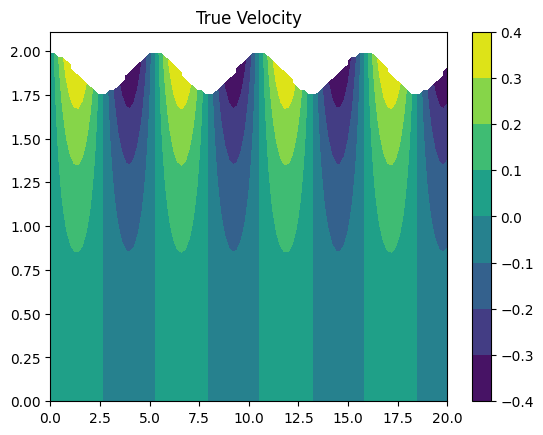

In [10]:
plt.contourf(X,Y,e,vmin=vmin,vmax=vmax)
plt.colorbar()
plt.title("True Velocity")

In [11]:
e = np.zeros_like(X)
t=0.0
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i,j],0.0,Y[i,j]])
        #e[i,j] = (TS.u(x, t) - RW.u(x,t))[0]**2
        e[i,j] = TS.u(x,t)[2]
        if Y[i,j] >  depth + TS.eta(x, t):
            e[i,j] = np.nan

Text(0.5, 1.0, 'Reconstructed Velocity')

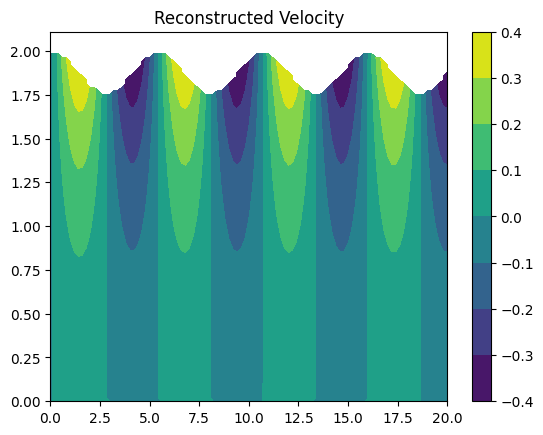

In [12]:
plt.contourf(X,Y,e)#,vmin=vmin,vmax=vmax)
plt.colorbar()
plt.title("Reconstructed Velocity")

In [13]:
e = np.zeros_like(X)
t=0.0
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        x = np.array([X[i,j],0.0,Y[i,j]])
        e[i,j] = (TS.u(x, t) - RW.u(x,t))[0]**2
        if Y[i,j] >  depth + TS.eta(x, t):
            e[i,j] = np.nan

Text(0.5, 1.0, 'Velocity error')

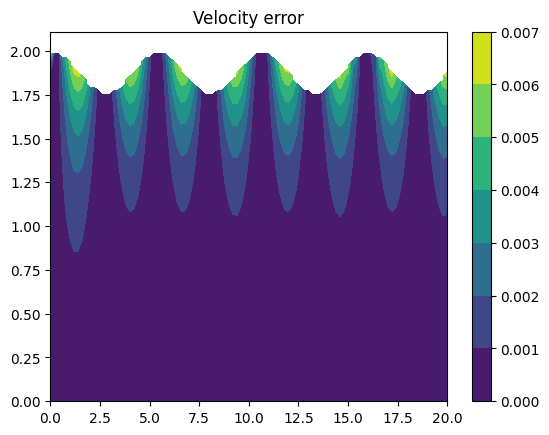

In [14]:
plt.contourf(X,Y,e)
plt.colorbar()
plt.title("Velocity error")